<a href="https://colab.research.google.com/github/njones5714/My-notebook/blob/main/Project_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv"
df = pd.read_csv(url)

df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [19]:
# Remove rows missing key info
df = df.dropna(subset=['character', 'sentimentAnalysis_score'])

# Find the top 6 characters with the most lines
top_characters = df['character'].value_counts().head(6).index.tolist()

# Filter dataset to only include those top characters
df_top = df[df['character'].isin(top_characters)]

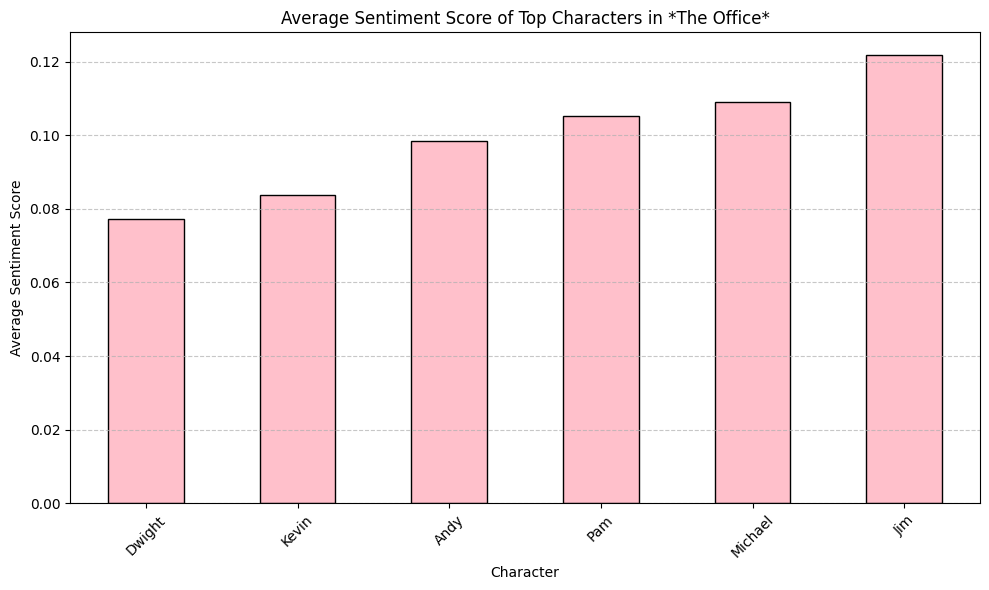

In [26]:
# Calculate average sentiment score for each top character
avg_sentiment = df_top.groupby('character')['sentimentAnalysis_score'].mean().sort_values()

# Create a bar chart to visualize  the results
plt.figure(figsize=(10,6))
avg_sentiment.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Average Sentiment Score of Top Characters in *The Office*')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Character')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle= '--', alpha=0.7)
plt.tight_layout()
plt.show()

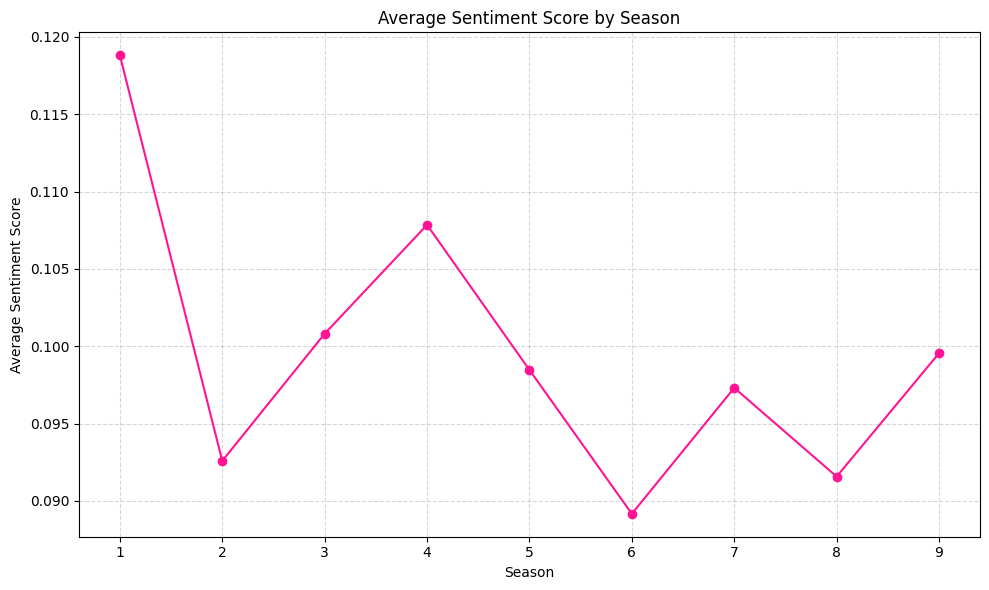

In [35]:
seasonal_sentiment = df.groupby('season')['sentimentAnalysis_score'].mean()

plt.figure(figsize=(10,6))
seasonal_sentiment.plot(marker='o', linestyle='-', color='deeppink')
plt.title('Average Sentiment Score by Season')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Season')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(seasonal_sentiment.index)
plt.tight_layout()
plt.show()